# Heart Disease Prediction Using 4 Models

`Author:` [Prashant Sharma](https://github.com/Prashantpq)\
`Date:` 26.November.2024\
`Dataset:` [Hear Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

### About Dataset (Meta data)
#### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id `(Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
  1. typical angina.
  2. atypical angina.
  3. non-anginal.
  4. asymptomatic.
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `-- Values:` [normal, stt abnormality, lv hypertrophy]
* `thalach:` maximum heart rate achieved
* `exang:` exercise-induced angina (True/ False)
* `oldpeak:` ST depression induced by exercise relative to rest
* `slope:` the slope of the peak exercise ST segment
* `ca:` number of major vessels (0-3) colored by fluoroscopy
* `thal:`[normal; fixed defect; reversible defect]
* `num:` the predicted attribute

### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 

#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

# `Import Libraries`

In [266]:
# Import libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models and utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# `Load the Dataset`

In [267]:
df = pd.read_csv('Data/data.csv')

# Display the first 10 rows of the dataset
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


# `Data Preprocessing`

In [268]:
# Explore the data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [269]:
#Checking the data shape
df.shape

(920, 16)

In [270]:
# Check for missing values in the dataset
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

`There are some columns in the datset which has missing values.`


`Columns containing missing values :
trestbps,
chol,
fbs,
restecg,
thalch,
exang,
oldpeak,
slope,
ca,
thal`

In [271]:
# Summary statistics of numerical columns
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [272]:
# Display the data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [273]:
# Check unique values in categorical columns
print("Sex:", df['sex'].unique())
print("dataset:", df['dataset'].unique())
print("Chest Pain Type:", df['cp'].unique())
print("fbs Type:", df['fbs'].unique())
print("Resting Electrocardiographic Results:", df['restecg'].unique())
print("Exercise Induced Angina:", df['exang'].unique())
print("exang Type:", df['exang'].unique())
print("Slope Type:", df['slope'].unique())
print("Thal Type:", df['thal'].unique())

Sex: ['Male' 'Female']
dataset: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
Chest Pain Type: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
fbs Type: [True False nan]
Resting Electrocardiographic Results: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
Exercise Induced Angina: [False True nan]
exang Type: [False True nan]
Slope Type: ['downsloping' 'flat' 'upsloping' nan]
Thal Type: ['fixed defect' 'normal' 'reversable defect' nan]


In [274]:
# Check missing values in numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
missing_numerical = df[numerical_columns].isnull().sum()

print("Missing values in numerical columns:")
print(missing_numerical)

Missing values in numerical columns:
id            0
age           0
trestbps     59
chol         30
thalch       55
oldpeak      62
ca          611
num           0
dtype: int64


In [275]:
# Check missing values in categorical columns
categorical_columns = df.select_dtypes(include=[object]).columns
missing_categorical = df[categorical_columns].isnull().sum()

print("Missing values in categorical columns:")
print(missing_categorical)

Missing values in categorical columns:
sex          0
dataset      0
cp           0
fbs         90
restecg      2
exang       55
slope      309
thal       486
dtype: int64


In [276]:
# Handle missing values in numerical columns by filling with the mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Verify if missing values are handled
missing_numerical_after = df[numerical_columns].isnull().sum()
print("Missing values in numerical columns after imputation:")
print(missing_numerical_after)

Missing values in numerical columns after imputation:
id          0
age         0
trestbps    0
chol        0
thalch      0
oldpeak     0
ca          0
num         0
dtype: int64


In [277]:
# Handle missing values in categorical columns by filling with the mode
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify if missing values are handled
missing_categorical_after = df[categorical_columns].isnull().sum()
print("Missing values in categorical columns after imputation:")
print(missing_categorical_after)

Missing values in categorical columns after imputation:
sex        0
dataset    0
cp         0
fbs        0
restecg    0
exang      0
slope      0
thal       0
dtype: int64


In [278]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

`Now there are no missing values in the dataset`

In [279]:
# Check NaN values in the entire dataset
nan_values = df.isna().sum()
print("NaN values in each column:\n", nan_values)

NaN values in each column:
 id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


`There are no nan values in the entire dataset`

In [280]:
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [281]:
df = df.drop(['id'], axis=1)

`There was no use of id column so we have dropped it`

In [282]:
df.head(10)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


# `Exploratory Data Analysis (EDA)`

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    bool   
 7   restecg   920 non-null    object 
 8   thalch    920 non-null    float64
 9   exang     920 non-null    bool   
 10  oldpeak   920 non-null    float64
 11  slope     920 non-null    object 
 12  ca        920 non-null    float64
 13  thal      920 non-null    object 
 14  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(6)
memory usage: 95.4+ KB


# `Analysis of Age Column`

In [284]:
print('Age Summary Statistics:')
df['age'].describe()

Age Summary Statistics:


count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [285]:
df['age'].min(), df['age'].max()

(28, 77)

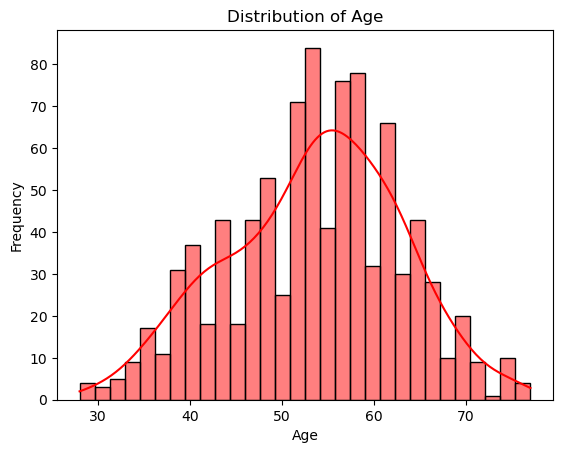

In [286]:
sns.histplot(df['age'], kde=True, bins=30, color='red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

`The distributon seems to be normally distributed as we can see the bell curve`

Mean 53.51086956521739
Median 54.0
Mode 0    54
Name: age, dtype: int64


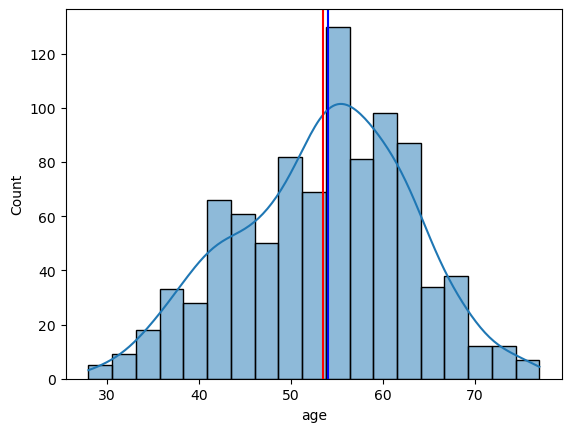

In [287]:
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='Red')
plt.axvline(df['age'].median(), color= 'orange')
plt.axvline(df['age'].mode()[0], color='Blue')

# print the value of mean, median and mode of age column
print('Mean', df['age'].mean())
print('Median', df['age'].median())
print('Mode', df['age'].mode())

`Insight : The age column has a central tendency`

`Gender base distribution for age column`

In [288]:
import plotly.express as px
fig = px.histogram(data_frame=df, x='age', color= 'sex')
fig.show()

# `Exploring Gender Column`

In [289]:
# Find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

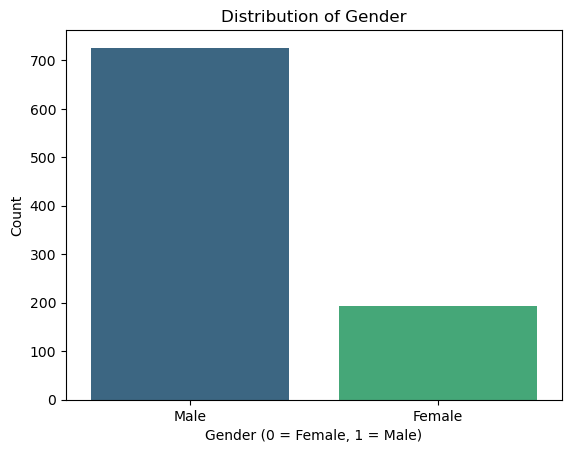

In [290]:
sns.countplot(x=df['sex'], data=df, palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

In [291]:
# calculating the percentage fo male and female value counts in the data

male_count = 726
female_count = 194

total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

# display the results
print(f'Male percentage in the data: {male_percentage:.2f}%')
print(f'Female percentage in the data: {female_percentages:.2f}%')

Male percentage in the data: 78.91%
Female percentage in the data: 21.09%


`Males are way more than females in the dataset`

# `Exploring the Dataset Column`

In [292]:
# find the unique values in the dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [293]:
# plot the countplot of dataset column
fig =px.bar(df, x='dataset', color='sex')
fig.show()

# print the values of dataset column groupes by sex
print (df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


`Most of the males are from Hungary and Cleveland, same with females`

In [294]:
fig = px.histogram(data_frame=df, x='age', color= 'dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print("___________________________________________________________")
print ("Mean of the dataset: ",df.groupby('dataset')['age'].mean())
print("___________________________________________________________")
print ("Median of the dataset: ",df.groupby('dataset')['age'].median())
print("___________________________________________________________")
print ("Mode of the dataset: ",df.groupby('dataset')['age'].agg(pd.Series.mode))
print("___________________________________________________________")

___________________________________________________________
Mean of the dataset:  dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
___________________________________________________________
Median of the dataset:  dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
___________________________________________________________
Mode of the dataset:  dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
___________________________________________________________


`Hungary and Cleveland are dominating in the dataset`

# `Exploring Chest pain Column (CP)`

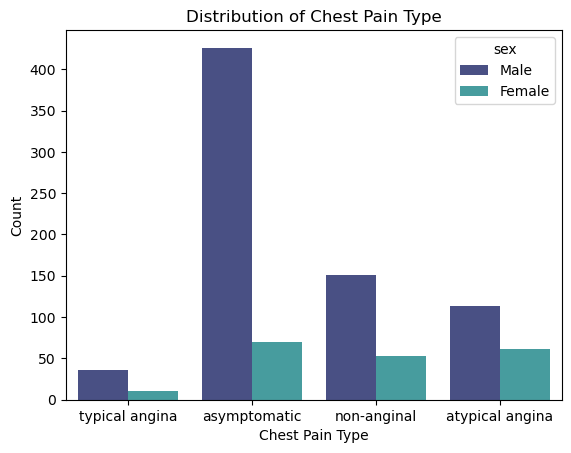

In [295]:
sns.countplot(x=df['cp'], hue='sex', data=df, palette='mako')
plt.title('Distribution of Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

In [296]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

`Most common chest pain type is asymptomatic with 496 counts and most of them are males`

<Axes: xlabel='cp', ylabel='count'>

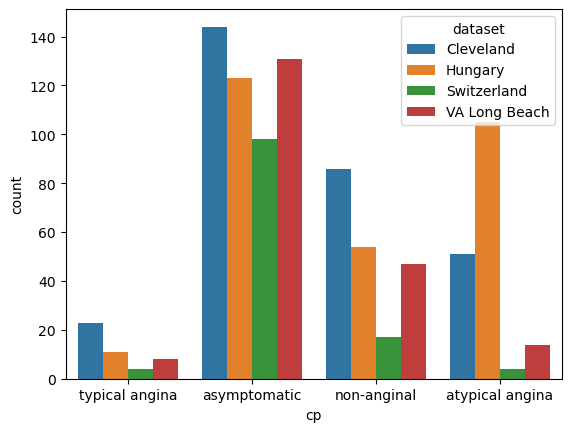

In [297]:
# count plot of cp column by dataset column
sns.countplot(df,x='cp',hue='dataset')

# `Exploring trestbps Column` 

In [298]:
print("Resting Blood Pressure Summary Statistics:")
print(df['trestbps'].describe())

Resting Blood Pressure Summary Statistics:
count    920.000000
mean     132.132404
std       18.443895
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


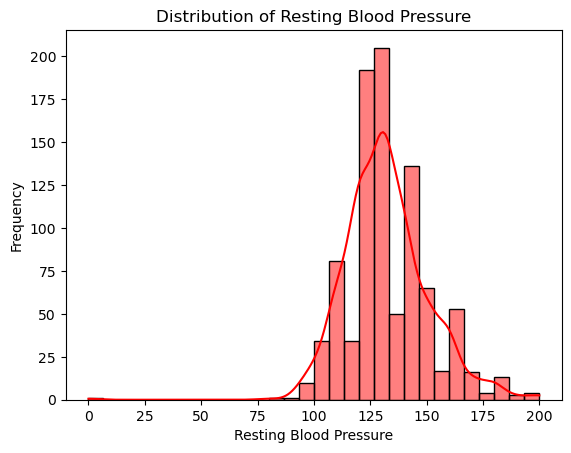

In [299]:
sns.histplot(df['trestbps'], kde=True, bins=30, color='red')
plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.show()

# `Identifying and Handling Outliers`

Column: age
Number of outliers: 0


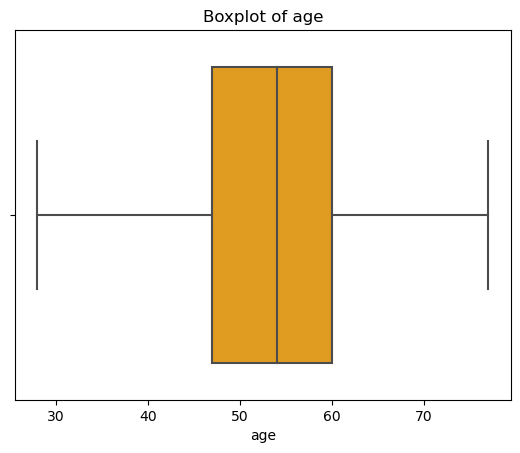

After handling outliers, dataset shape: (920, 15)
Column: trestbps
Number of outliers: 28


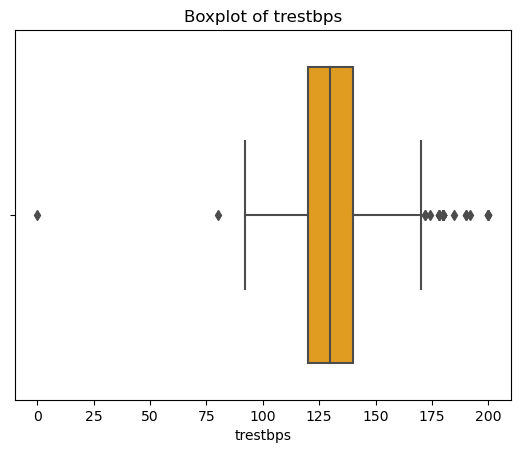

After handling outliers, dataset shape: (892, 15)
Column: chol
Number of outliers: 177


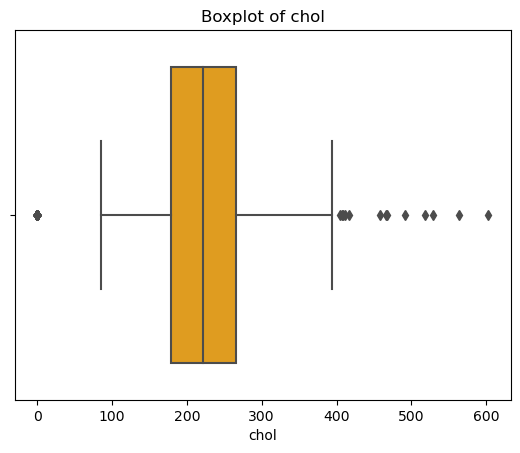

After handling outliers, dataset shape: (715, 15)
Column: thalch
Number of outliers: 1


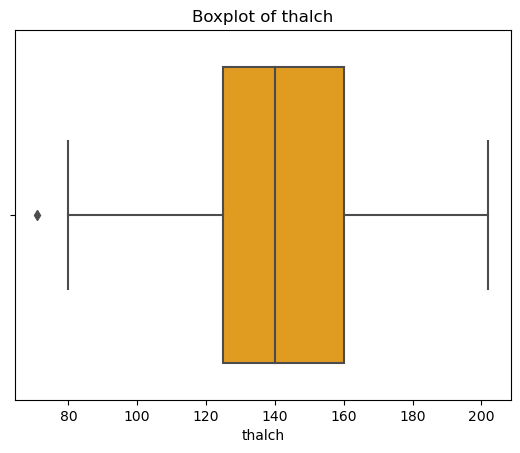

After handling outliers, dataset shape: (714, 15)
Column: oldpeak
Number of outliers: 12


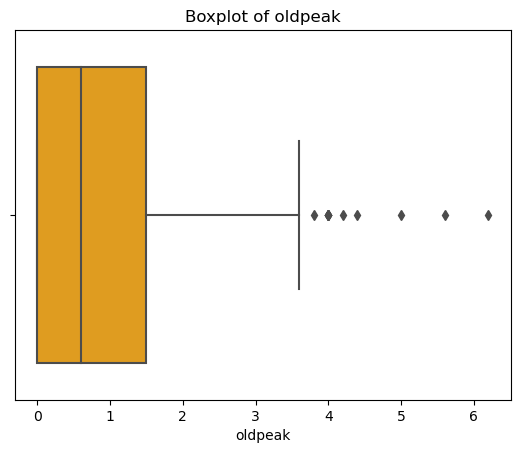

After handling outliers, dataset shape: (702, 15)


In [300]:
# List of numerical columns
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
for col in numerical_columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    
    # Visualization
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()
    
    # Handle outliers: Remove rows with outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"After handling outliers, dataset shape: {df.shape}")


`All outliers in the numerical columns have been successfully identified and handled.`

In [301]:
df.shape

(702, 15)

In [302]:
df.head(10)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


##### `Analysis of plotting`

> * Everything seems fine and there are no outliers in the columns.
> * Columns are cleaned from outliers and also there are no missing values in the dataset.
> * The next step is Feature Selection but before that we need to encode the categorical columns.

In [303]:
# label Encoding

from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['sex','dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [304]:
df.head(10)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0
5,56,1,0,1,120.0,236.0,0,1,178.0,0,0.8,2,0.0,1,0
6,62,0,0,0,140.0,268.0,0,0,160.0,0,3.6,0,2.0,1,3
7,57,0,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0.0,1,0
8,63,1,0,0,130.0,254.0,0,0,147.0,0,1.4,1,1.0,2,2
9,53,1,0,0,140.0,203.0,1,0,155.0,1,3.1,0,0.0,2,1


`Now everything is good to go for feature selections`

# `Feature Selection using (RFE)`

In [305]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

X = df.drop('num', axis=1)  
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=10000, solver='saga')  # You can use 'lbfgs', 'liblinear', or 'saga'

rfe = RFE(estimator=model, n_features_to_select=10)

X_train_rfe_scaled = rfe.fit_transform(X_train_scaled, y_train)

model.fit(X_train_rfe_scaled, y_train)

selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

X_test_rfe_scaled = X_test_scaled[:, rfe.support_]
y_pred = model.predict(X_test_rfe_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Selected Features: Index(['age', 'sex', 'cp', 'chol', 'thalch', 'exang', 'oldpeak', 'slope', 'ca',
       'thal'],
      dtype='object')
Model Accuracy: 0.67


`Selected features :['age', 'sex', 'cp', 'chol', 'thalch', 'exang', 'oldpeak', 'slope', 'ca','thal']`

In [309]:
# Make sure df_selected is a copy of the original df if necessary
df_selected = df[['age', 'sex', 'cp', 'chol', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()

# Now, safely concatenate the 'num' column using .loc
df_selected.loc[:, 'num'] = df['num']

# Check the updated DataFrame
print(df_selected.head())


   age  sex  cp   chol  thalch  exang  oldpeak  slope   ca  thal  num
0   63    1   3  233.0   150.0      0      2.3      0  0.0     0    0
1   67    1   0  286.0   108.0      1      1.5      1  3.0     1    2
2   67    1   0  229.0   129.0      1      2.6      1  2.0     2    1
3   37    1   2  250.0   187.0      0      3.5      0  0.0     1    0
4   41    0   1  204.0   172.0      0      1.4      2  0.0     1    0


In [310]:
df_selected.head(10)

,age,sex,cp,chol,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,233.0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,286.0,108.0,1,1.5,1,3.0,1,2
2,67,1,0,229.0,129.0,1,2.6,1,2.0,2,1
3,37,1,2,250.0,187.0,0,3.5,0,0.0,1,0
4,41,0,1,204.0,172.0,0,1.4,2,0.0,1,0
5,56,1,1,236.0,178.0,0,0.8,2,0.0,1,0
6,62,0,0,268.0,160.0,0,3.6,0,2.0,1,3
7,57,0,0,354.0,163.0,1,0.6,2,0.0,1,0
8,63,1,0,254.0,147.0,0,1.4,1,1.0,2,2
9,53,1,0,203.0,155.0,1,3.1,0,0.0,2,1


In [311]:
df_selected.shape

(702, 11)

# `Machine Learning Models and Evaluation`

`Feature that we will be using in Machine Learning Models`

The Targeted column is `num` which is the predicted attribute. We will use this column to predict the heart disease.
The unique values in this column are: [0,1,2,3,4], which states that there are 5 types of heart diseases.

* `0 = no heart disease.`
* `1 = Mild Heart Disease types.`
* `2 = Moderate Heart Disease type.`
* `3 =  Severe Heart Disease type.`
* `4 =  Critical Heart Disease type.`

In [317]:
# split the data into X and y
X= df_selected.drop('num', axis=1)
y = df_selected['num']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

list of all the models that we will use to predict the heart disease. These models should be classifiers for multi_class classification.

1. SVM
2. Decision Tree
3. Random Forest
4. XGBoost

In [328]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [329]:
import warnings
warnings.filterwarnings('ignore')

In [330]:
# Models to evaluate
models = [
    ("SVM", SVC(probability=True)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("XGBoost", XGBClassifier())
]

for name, model in models:
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_cv_score = cross_val_scores.mean()  # Mean cross-validation score

    model.fit(X_train, y_train)
    
    test_score = model.score(X_test, y_test)  # Accuracy on the test set
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    try:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='macro')
    except ValueError:
        roc_auc = None
    
    print(f"Model: {name}")
    print(f"Mean Cross-Validation Score: {mean_cv_score:.4f}")
    print(f"Test Score (Accuracy): {test_score:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{class_report}")
    if roc_auc is not None:
        print(f"ROC AUC (One-vs-Rest): {roc_auc:.4f}")
    else:
        print("ROC AUC could not be calculated for this model.")
    print("-" * 60)


Model: SVM
Mean Cross-Validation Score: 0.5452
Test Score (Accuracy): 0.4789
Confusion Matrix:
[[34  0  0  0]
 [26  0  0  0]
 [ 6  0  0  0]
 [ 5  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        34
           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5

    accuracy                           0.48        71
   macro avg       0.12      0.25      0.16        71
weighted avg       0.23      0.48      0.31        71

ROC AUC could not be calculated for this model.
------------------------------------------------------------
Model: Decision Tree
Mean Cross-Validation Score: 0.5340
Test Score (Accuracy): 0.5493
Confusion Matrix:
[[31  1  2  0]
 [16  6  2  2]
 [ 2  3  1  0]
 [ 2  1  1  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.91